In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

In [15]:
npix_use = 79
colors = ((255, 255, 0), (255, 170, 0), (255, 0, 0))

<IPython.core.display.Javascript object>


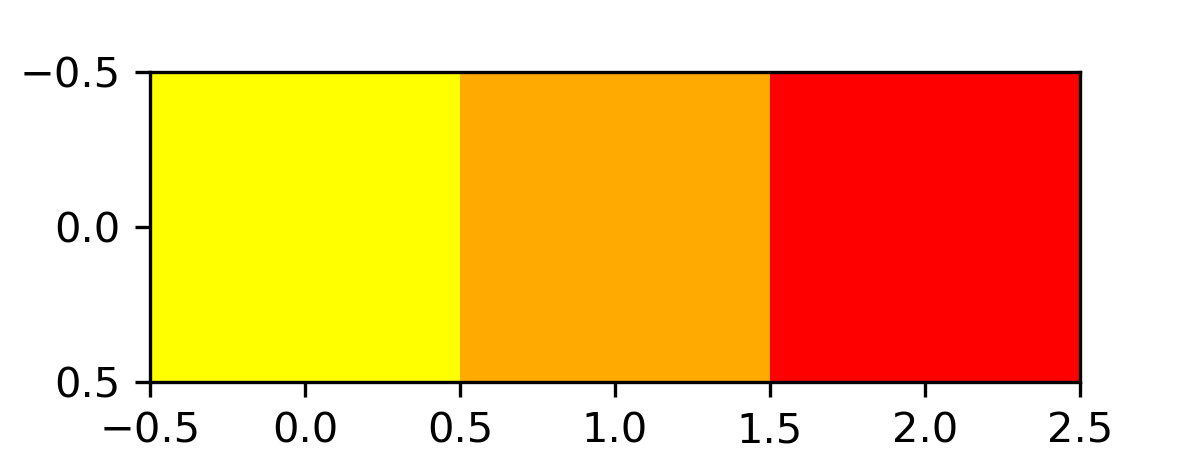

In [21]:
# show the color pallette
plt.figure(figsize=(4, 1.5))
im = np.array([[colors[0], colors[1], colors[2]], ])
plt.imshow(im)

In [26]:
def color_mix(x):
  y = np.zeros(3)
  for i in range(3):
    k1 = (colors[2][i] - colors[0][i]) / 2
    k2 = (colors[0][i] + colors[2][i]) / 2 - colors[1][i]
    k4 = colors[1][i]
    y[i] = k1 * x**3 + k2 * x**2 + k4
  return y


In [66]:
lights = np.zeros(npix_use)
nmodes = 4
freqs = np.array([1, -1.3, 1.3 * np.pi, -np.pi])
amps = np.ones(4)
wlengths = np.array([1, 1, .5, .5])
pos = np.linspace(0, 1, npix_use).reshape(-1, 1)
time = np.linspace(0, 5, 1000).reshape(1, -1)

lights_x = (amps[0] * np.exp(2j*np.pi * (pos / wlengths[0] - time * freqs[0])) +
            amps[1] * np.exp(2j*np.pi * (pos / wlengths[1] - time * freqs[1])) +
            amps[2] * np.exp(2j*np.pi * (pos / wlengths[2] - time * freqs[2])) + 
            amps[3] * np.exp(2j*np.pi * (pos / wlengths[3] - time * freqs[3])))
lights_x = np.real(lights_x)

<IPython.core.display.Javascript object>


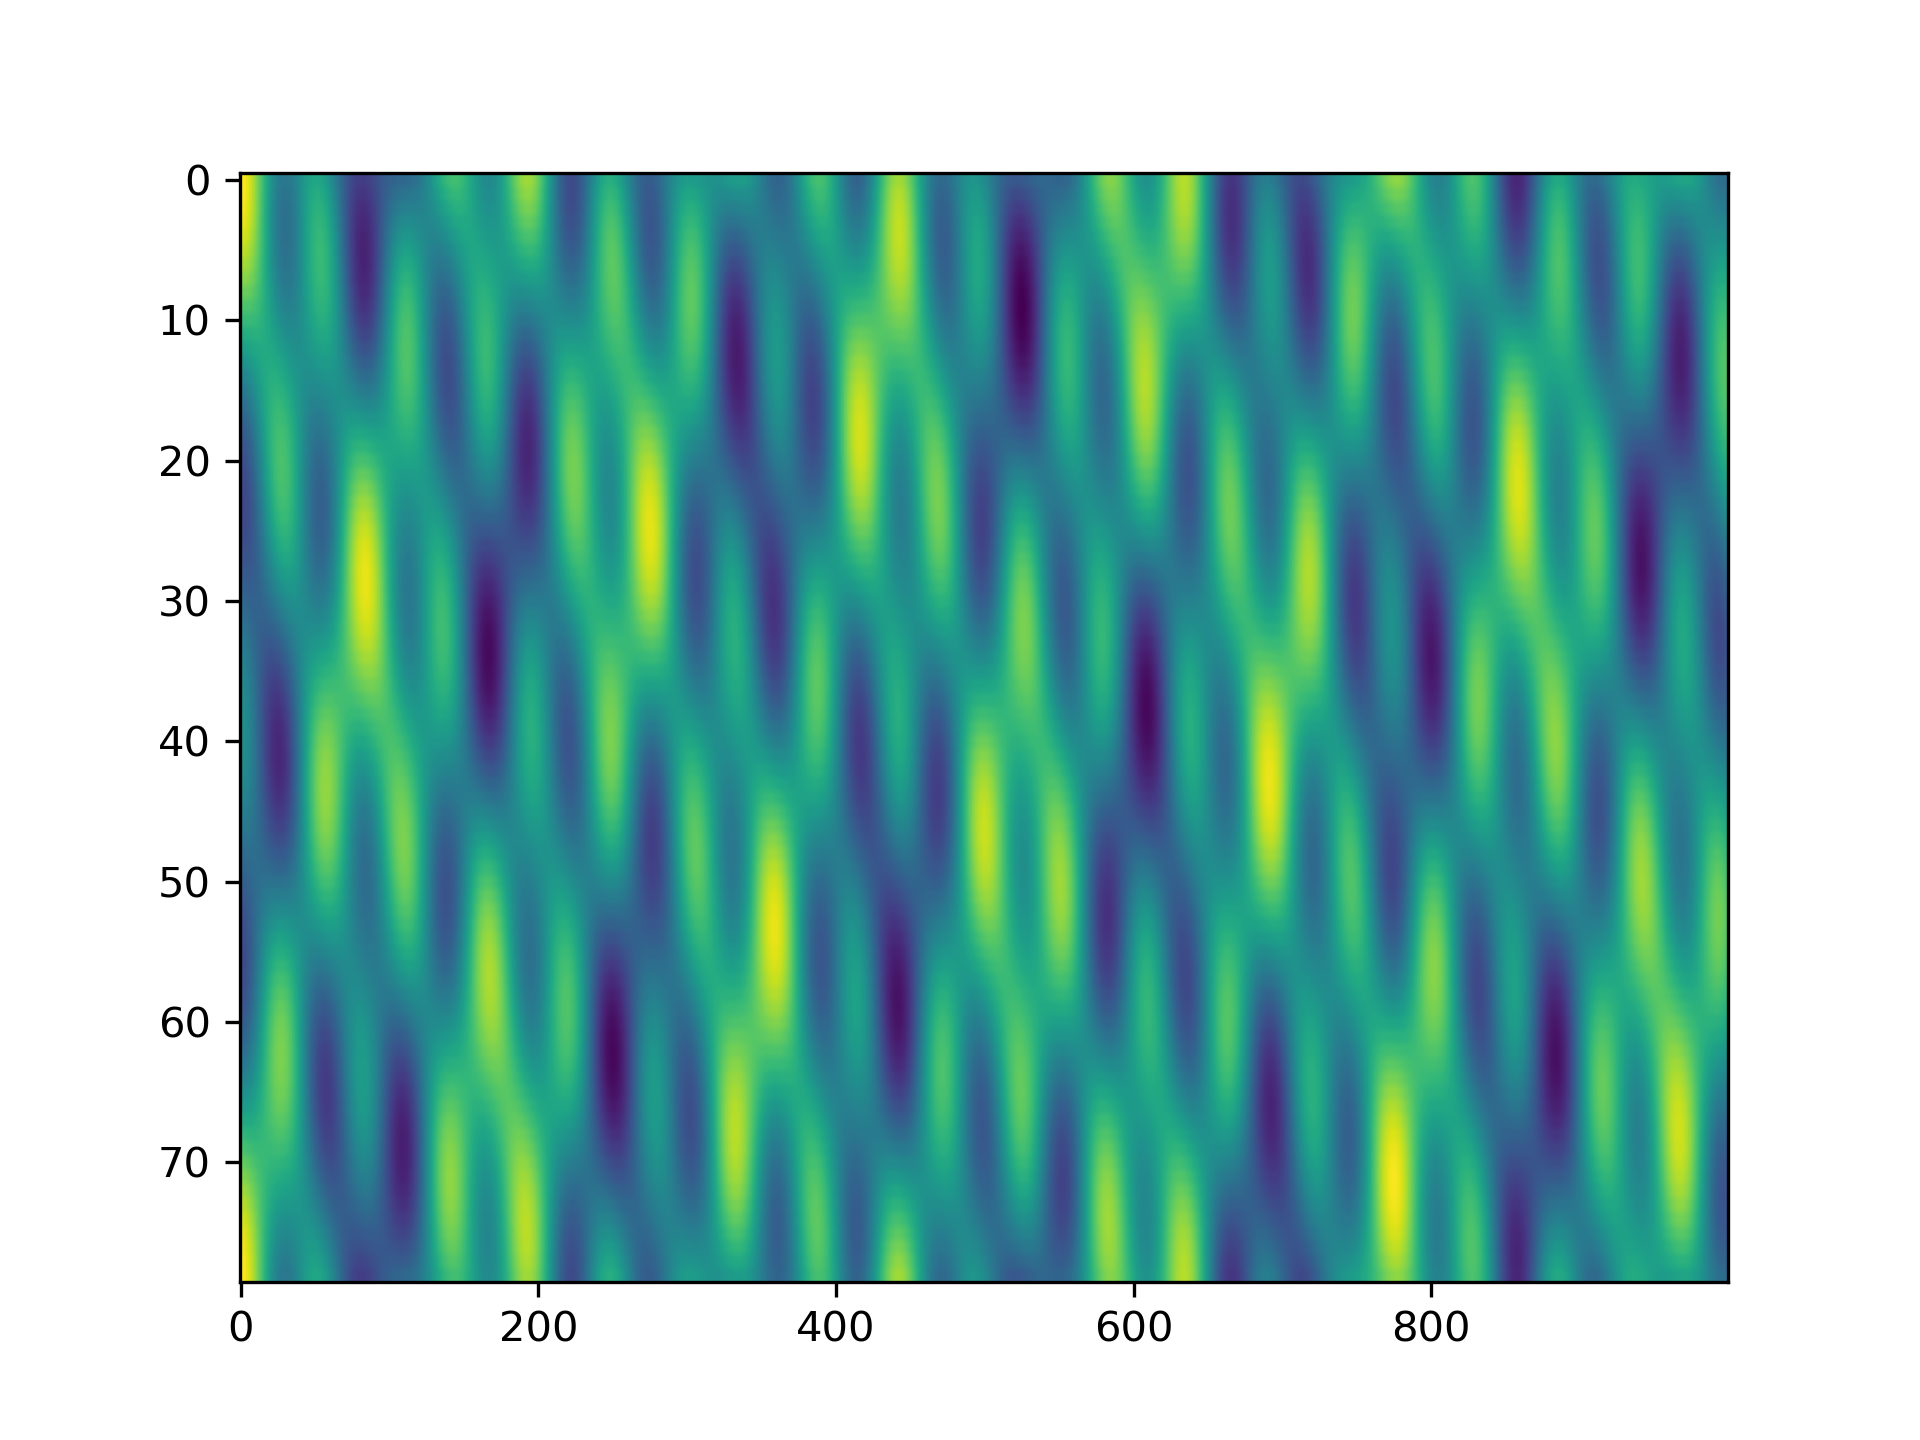

In [67]:
plt.figure()
plt.imshow(lights_x, aspect='auto')

<IPython.core.display.Javascript object>


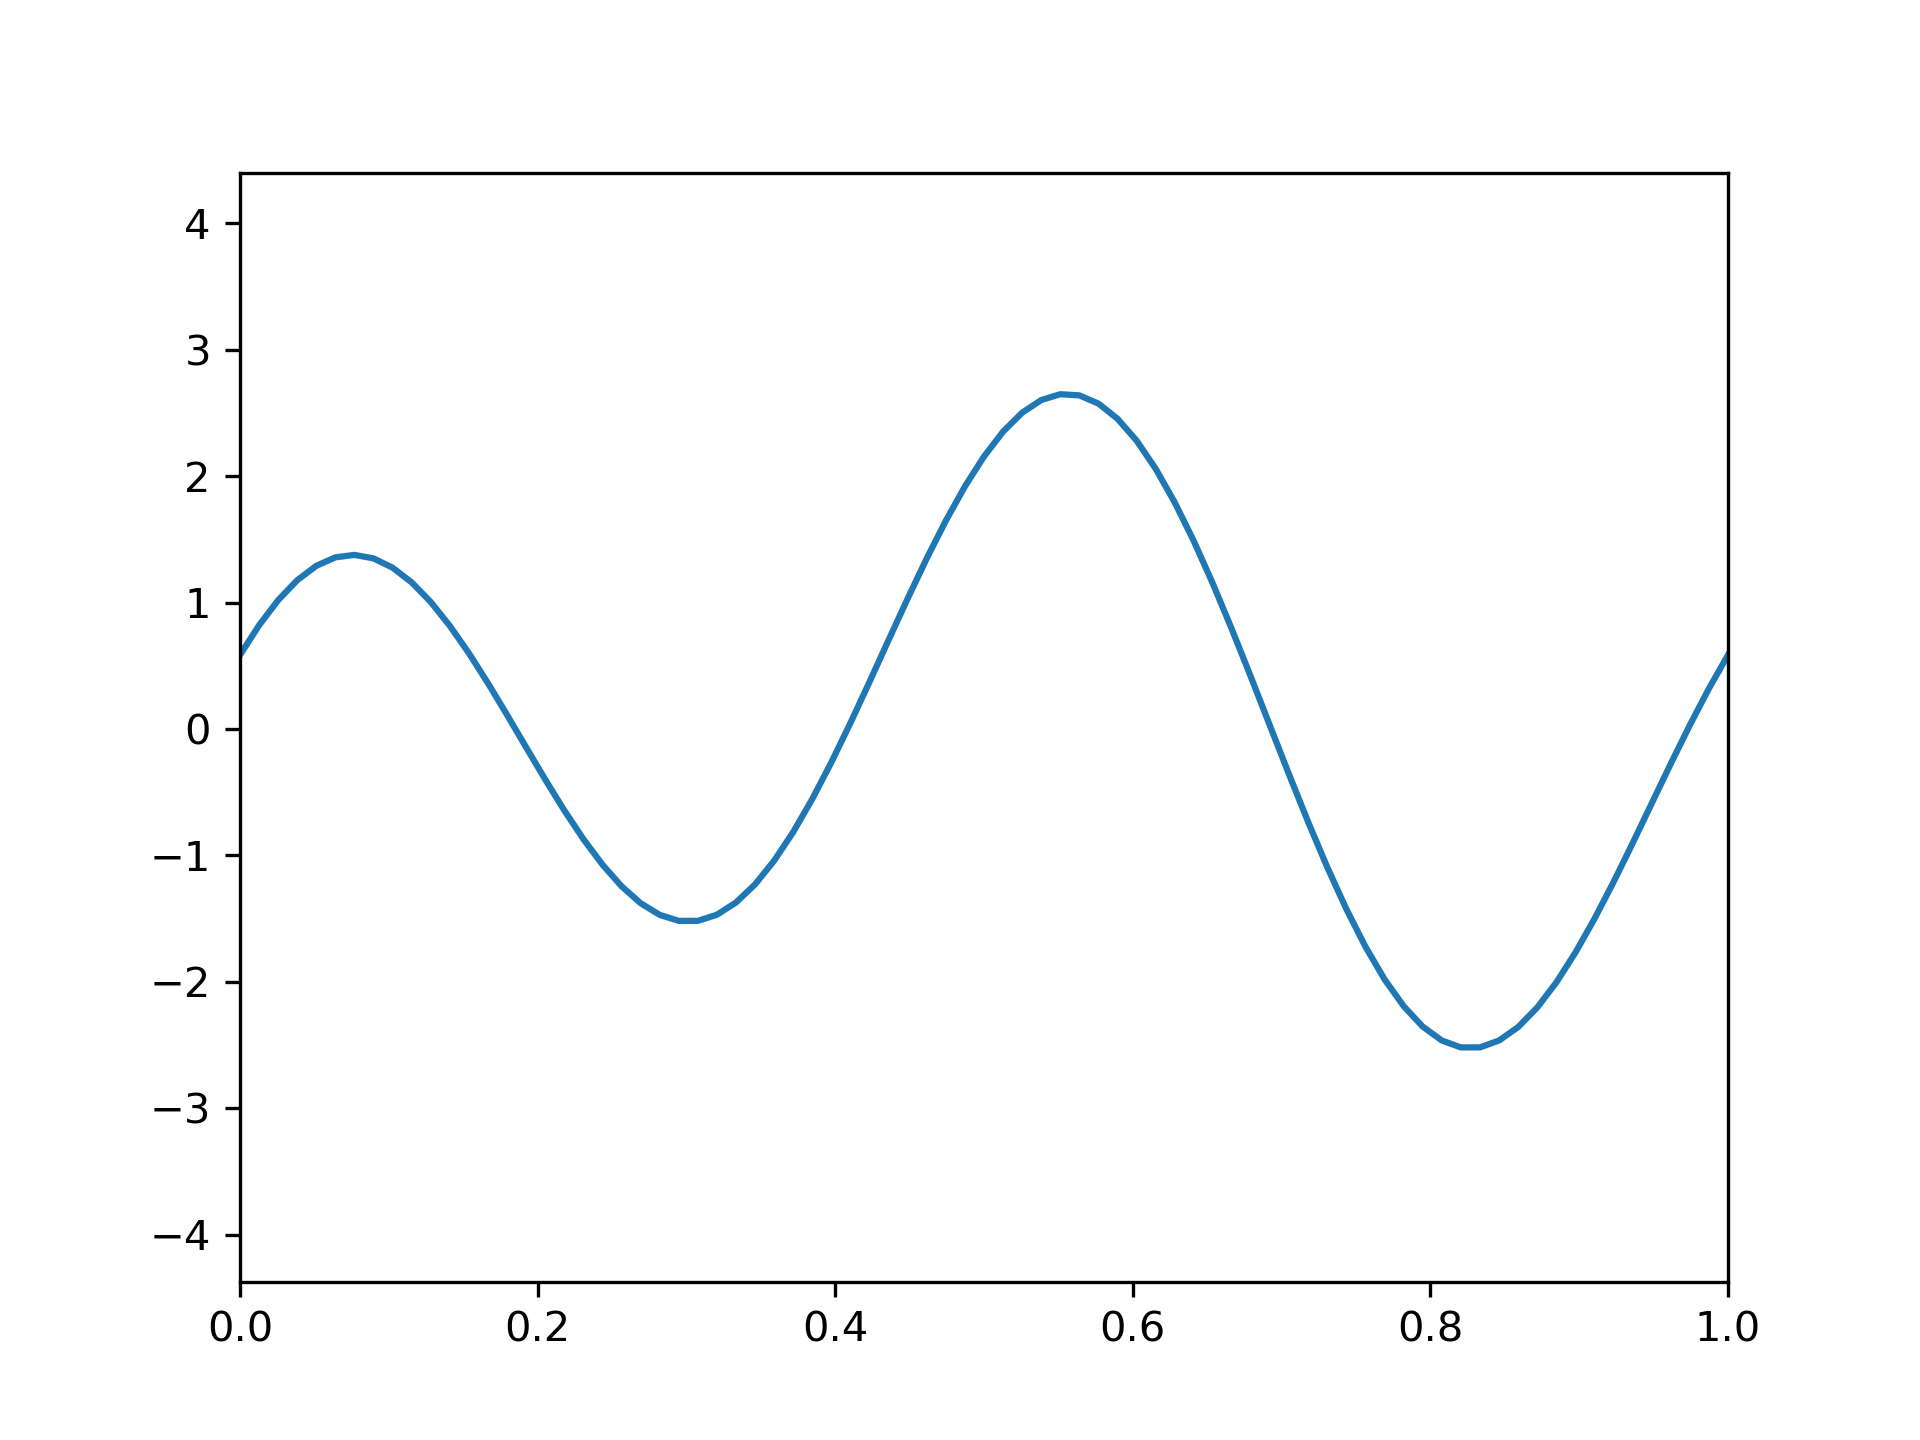

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.set_xlim([0, 1])
ax.set_ylim(1.1 * np.min(lights_x), 1.1 * np.max(lights_x))
line = ax.plot([], [])


def init():
    line[0].set_data([], [])

def animate(i):
    line[0].set_data(pos[:, 0], lights_x[:, i])

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(time[0, :]), interval=100, blit=True)
HTML(anim.to_html5_video())